In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils import classification_evaluation, user_input, pipe_model

In [19]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')
dataframe = dataframe.drop(['age', 'id'], axis=1)

In [20]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [21]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [22]:
scaler = StandardScaler()

param_grid_decision_tree = {"dt__max_depth": [3, 5, 7], "dt__min_samples_leaf": [2, 4, 6]}
pipeline_decision_tree = Pipeline([("scaler", scaler), ("dt", DecisionTreeClassifier())])

classifier_decision_tree = GridSearchCV(
    estimator=pipeline_decision_tree,
    param_grid=param_grid_decision_tree,
    cv=5,
    scoring="accuracy",
)

In [23]:
classifier_decision_tree.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3202
           1       0.76      0.68      0.72      3120

    accuracy                           0.74      6322
   macro avg       0.74      0.74      0.74      6322
weighted avg       0.74      0.74      0.74      6322



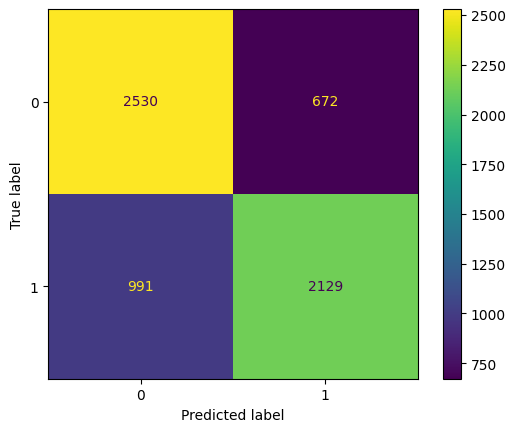

In [24]:
classification_evaluation(model=classifier_decision_tree, x_test=X_val, y_test=y_val)

In [25]:
#Training entire X_train dataset

classifier_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

In [26]:
y_predictions = classifier_decision_tree.predict(X_test)

In [27]:
print(y_predictions[:10], y_test[:10].to_list())

[1 0 0 0 1 0 0 1 0 0] [1, 0, 0, 0, 1, 0, 0, 1, 0, 0]


---

In [28]:
explainatory, response = dataframe.drop('cardio', axis=1), dataframe['cardio']

In [29]:
pipe = pipe_model(("scaler", scaler), ("dt", DecisionTreeClassifier(max_depth=5, min_samples_leaf=6)))

In [30]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [31]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [32]:
pipe.predict(user1)

array([0])

In [33]:
pipe.predict(user2)

array([0])